In [2]:
import seaborn
import numpy as np
import pandas as pd
import scipy.stats as sc
import matplotlib.pylab as pl
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
pd.options.display.max_columns = None

# Has Ticketing Increased as a Result of Vision Zero?
### Load Data:

In [3]:
# Load data to df in dictionary.
Tickets = {}
path = '/Users/JordanVani/Documents/NYU/ADS/Report/Vision_Zero/TicketSummonses/Annual_Data_City/'
Tickets['y2011'] = pd.read_excel(path + 'citysum2011.xlsx', header = 3).dropna(how='any').transpose()
Tickets['y2012'] = pd.read_excel(path + 'citysum2012.xlsx', header = 3).dropna(how='any').transpose()
Tickets['y2013'] = pd.read_excel(path + 'citysum2013.xlsx', header = 3).dropna(how='any').transpose()
Tickets['y2014'] = pd.read_excel(path + 'citysum2014.xlsx', header = 4).dropna(how='any').transpose()
Tickets['y2015'] = pd.read_excel(path + 'citysum2015.xlsx', header = 4).dropna(how='any').transpose()
Tickets['y2016'] = pd.read_excel(path + 'citysum2016.xlsx', header = 4).dropna(how='any').transpose()

for df in Tickets:
    Tickets[df].columns = Tickets[df].iloc[0]
    Tickets[df] = Tickets[df].drop(['Offense'])

# Concatenated each years data
frames = [Tickets['y2011'], Tickets['y2012'], Tickets['y2013'], Tickets['y2014'], Tickets['y2015'], Tickets['y2016']]
df = pd.concat(frames)

# Drop unnecessary fields.
df = df.drop(['MTD 2011'])
df = df.drop(['MTD 2012'])
df = df.drop(['MTD 2013'])
df = df.drop(['MTD 2014'])
df = df.drop(['MTD 2015'])
df = df.drop(['MTD 2016'])
df = df.drop(['YTD 2016'])

# Add Year column to df.
df['Year'] = pd.Series(np.array([2011, 2012, 2013, 2014, 2015])).values

# Create sum column.
df['Total_Sum'] = df[df.columns].sum(axis = 1)

# Save to csv.
df.to_csv(path + 'NYCTicketSummonses.csv', encoding = 'utf-8')

### Plot Total Tickets by Year

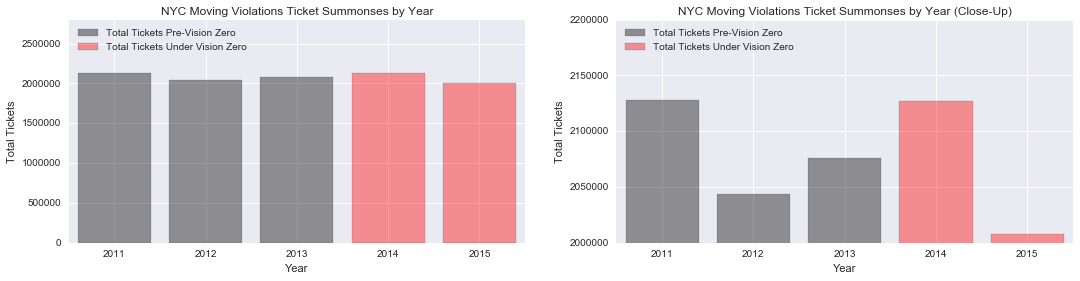

In [4]:
fig1, (ax1, ax2) = pl.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
width = 0.8
ax1.bar(df.Year[0:3], df.Total_Sum[0:3], color = 'k', alpha = 0.4,
         label = 'Total Tickets Pre-Vision Zero', align = 'center')
ax1.bar(df.Year[3:5], df.Total_Sum[3:5], color = 'r', alpha = 0.4,
         label = 'Total Tickets Under Vision Zero', align = 'center')
ax1.set_ylabel('Total Tickets')
ax1.set_xlabel('Year')
ax1.set_title('NYC Moving Violations Ticket Summonses by Year')
ax1.axis([2010.5, 2015.5, 0, 2800000])
ax1.legend(loc = 'upper left')

ax2.get_xaxis().get_major_formatter().set_useOffset(False)
width = 0.8
ax2.bar(df.Year[0:3], df.Total_Sum[0:3], color = 'k', alpha = 0.4,
         label = 'Total Tickets Pre-Vision Zero', align = 'center')
ax2.bar(df.Year[3:5], df.Total_Sum[3:5], color = 'r', alpha = 0.4,
         label = 'Total Tickets Under Vision Zero', align = 'center')
ax2.set_ylabel('Total Tickets')
ax2.set_xlabel('Year')
ax2.set_title('NYC Moving Violations Ticket Summonses by Year (Close-Up)')
ax2.axis([2010.5, 2015.5, 2000000, 2200000])
ax2.legend(loc = 'upper left')

#### Doesn't look like there's been any change in the absolute number of tickets issued by the NYPD; they seem to hover around 2M. This makes sense: there wasn't a hiring blitz of officers as part of Vision Zero. Instead, the NYPD's priorities may have shifted to be in line with the vision zero goals.
# What Tickets Are Being Prioritized by the NYPD?
### Load Data

In [5]:
# Load data to Dataframe
path = '/Users/JordanVani/Documents/NYU/ADS/Report/Vision_Zero/TicketSummonses/Annual_Data_City/'
df = pd.read_csv(path + 'NYCTicketSummonses.csv', index_col = 0).transpose()

# Drop extra rows
df.drop(df.index[[-1, -2, -12]], inplace=True)
df.dropna(axis = 0, how = 'any', inplace=True)

# Calculate columns.
df.columns = ['Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015']
df['PreVZ_Mean'] = (df['Y2011'] + df['Y2012'] + df['Y2013']) / 3
df['PostVZ_Mean'] = (df['Y2014'] + df['Y2015']) / 2
df['PercentChange'] = ((df['PostVZ_Mean'] - df['PreVZ_Mean']) / df['PreVZ_Mean'] * 100).round(2)
df['zscore'] = sc.mstats.zscore(df.PercentChange)

### Cluster Points to Observe NYPD Priorities

In [6]:
X = df.PercentChange
range_n_clusters = [3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X.reshape(-1, 1))
    silhouette_avg = silhouette_score(X.reshape(-1, 1), cluster_labels)
    print("For n_clusters = {}".format(n_clusters) +
          " the average silhouette_score is :{}".format(silhouette_avg.round(3)))

For n_clusters = 3 the average silhouette_score is :0.619
For n_clusters = 4 the average silhouette_score is :0.616
For n_clusters = 5 the average silhouette_score is :0.698
For n_clusters = 6 the average silhouette_score is :0.681
For n_clusters = 7 the average silhouette_score is :0.622


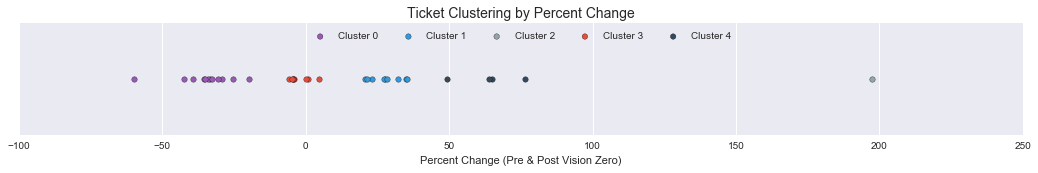

In [7]:
km = KMeans(n_clusters=5, random_state=30)
df['P1'] = km.fit_predict(X.reshape(-1, 1))

groups = df.groupby('P1')

# Plot by groups
fig, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (18, 2))
ax1.axes.get_yaxis().set_ticks([])
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
for name, group in groups:
    label = 'Cluster ' + str(name)
    ax1.scatter(group['PercentChange'], np.zeros(group['PercentChange'].shape),
                label = label, c = colors[name], s=30)
ax1.set_xlabel('Percent Change (Pre & Post Vision Zero)')
ax1.set_title('Ticket Clustering by Percent Change', fontsize = 14)
ax1.legend(ncol=5, loc='upper center')

In [8]:
df.sort_values('zscore', axis = 0, ascending = False, inplace = True)
df

,Y2011,Y2012,Y2013,Y2014,Y2015,PreVZ_Mean,PostVZ_Mean,PercentChange,zscore,P1
Not_Giving_RofW_to_Pedes,10448.0,11698.0,14888.0,33577.0,39853.0,12344.666667,36715.0,197.42,4.000184,2
School_Bus_Passing_Stopped,2739.0,3312.0,1371.0,5428.0,3298.0,2474.000000,4363.0,76.35,1.444892,4
Not_Giving_RofW_to_Veh,1951.0,2139.0,2335.0,3365.0,3696.0,2141.666667,3530.5,64.85,1.202174,4
Speeding,76493.0,71305.0,83202.0,117767.0,134438.0,77000.000000,126102.5,63.77,1.179379,4
Fail_to_Signal,13879.0,14208.0,18588.0,22088.0,24376.0,15558.333333,23232.0,49.32,0.874399,4
Unsafe_Lane_Change,4836.0,4203.0,4563.0,5880.0,6408.0,4534.000000,6144.0,35.51,0.582926,1
Fail_to_Stop_on_Signal,41644.0,37945.0,41055.0,53445.0,55199.0,40214.666667,54322.0,35.08,0.573851,1
U_Turn,3924.0,3912.0,4921.0,6930.0,4311.0,4252.333333,5620.5,32.17,0.512433,1
Improper_Turn,55601.0,56586.0,62356.0,73234.0,76049.0,58181.000000,74641.5,28.29,0.430542,1
Commercial_Veh_Pkwy,1658.0,864.0,1063.0,1430.0,1618.0,1195.000000,1524.0,27.53,0.414501,1


In [9]:
# Tickets that should affect collision rates:
dangerticks = ['Not_Giving_RofW_to_Pedes', 'School_Bus_Passing_Stopped',
       'Not_Giving_RofW_to_Veh', 'Speeding', 'Fail_to_Signal',
       'Unsafe_Lane_Change', 'Fail_to_Stop_on_Signal', 'U_Turn',
       'Improper_Turn', 'Commercial_Veh_Pkwy', 'ImproperMissing_Plates',
       'Backing_Unsafely', 'Other_Movers', 'Disobey_Sign',
       'Following_Too_Closely']

# Sum priority tickets over each year.
df = df.T
df['Priority_Tickets'] = df[dangerticks].sum(axis=1)
df['Year'] = [2011, 2012, 2013, 2014, 2015, 0, 0, 0, 0, 0,]
df

,Not_Giving_RofW_to_Pedes,School_Bus_Passing_Stopped,Not_Giving_RofW_to_Veh,Speeding,Fail_to_Signal,Unsafe_Lane_Change,Fail_to_Stop_on_Signal,U_Turn,Improper_Turn,Commercial_Veh_Pkwy,ImproperMissing_Plates,Backing_Unsafely,Other_Movers,Disobey_Sign,Following_Too_Closely,Equipment_Other,One_Way_Street,Improper_Passing,Unlicensed Operator,Pavement_Markings,Unregistered,Fail_to_Keep_Right,Tinted_Windows,Spillback,Headlights,Uninspected,Uninsured,Cell_Phone,Improper_Lights,Safety_Belt,Brake_Lights,Truck_Routes,Defective_Brakes,Bus_Lane,Priority_Tickets,Year
Y2011,10448.000000,2739.000000,1951.000000,76493.000000,13879.000000,4836.000000,41644.000000,3924.000000,55601.000000,1658.000000,2379.000000,1349.000000,50170.000000,128317.000000,1595.000000,9430.000000,5450.000000,4231.000000,55743.000000,21002.000000,11796.000000,433.000000,82307.000000,4986.000000,22369.000000,6628.000000,63721.000000,162407.000000,4850.000000,165444.000000,27818.000000,9098.000000,416.000000,7777.000000,396983.000000,2011
Y2012,11698.000000,3312.000000,2139.000000,71305.000000,14208.000000,4203.000000,37945.000000,3912.000000,56586.000000,864.000000,2473.000000,1217.000000,60274.000000,129926.000000,1129.000000,9714.000000,4489.000000,4699.000000,57250.000000,21478.000000,11320.000000,315.000000,95866.000000,4774.000000,24906.000000,6793.000000,56108.000000,141816.000000,4006.000000,131049.000000,30283.000000,6458.000000,483.000000,7756.000000,401191.000000,2012
Y2013,14888.000000,1371.000000,2335.000000,83202.000000,18588.000000,4563.000000,41055.000000,4921.000000,62356.000000,1063.000000,2958.000000,1569.000000,69088.000000,137250.000000,1119.000000,11269.000000,4985.000000,4806.000000,59510.000000,25271.000000,12422.000000,301.000000,88229.000000,4759.000000,26527.000000,6846.000000,56427.000000,126422.000000,3904.000000,119627.000000,27060.000000,6396.000000,383.000000,5472.000000,446326.000000,2013
Y2014,33577.000000,5428.000000,3365.000000,117767.000000,22088.000000,5880.000000,53445.000000,6930.000000,73234.000000,1430.000000,3308.000000,2022.000000,69979.000000,152617.000000,1336.000000,9272.000000,5137.000000,4632.000000,57023.000000,28707.000000,12211.000000,347.000000,74345.000000,4437.000000,21474.000000,5872.000000,47736.000000,106503.000000,3655.000000,98321.000000,22700.000000,4654.000000,327.000000,2745.000000,552406.000000,2014
Y2015,39853.000000,3298.000000,3696.000000,134438.000000,24376.000000,6408.000000,55199.000000,4311.000000,76049.000000,1618.000000,3329.000000,1369.000000,75485.000000,165389.000000,1345.000000,11171.000000,4835.000000,4152.000000,52968.000000,14410.000000,10357.000000,311.000000,68026.000000,2791.000000,13370.000000,3521.000000,31309.000000,84630.000000,1973.000000,81820.000000,13927.000000,4252.000000,165.000000,2892.000000,596163.000000,2015
PreVZ_Mean,12344.666667,2474.000000,2141.666667,77000.000000,15558.333333,4534.000000,40214.666667,4252.333333,58181.000000,1195.000000,2603.333333,1378.333333,59844.000000,131831.000000,1281.000000,10137.666667,4974.666667,4578.666667,57501.000000,22583.666667,11846.000000,349.666667,88800.666667,4839.666667,24600.666667,6755.666667,58752.000000,143548.333333,4253.333333,138706.666667,28387.000000,7317.333333,427.333333,7001.666667,414833.333333,0
PostVZ_Mean,36715.000000,4363.000000,3530.500000,126102.500000,23232.000000,6144.000000,54322.000000,5620.500000,74641.500000,1524.000000,3318.500000,1695.500000,72732.000000,159003.000000,1340.500000,10221.500000,4986.000000,4392.000000,54995.500000,21558.500000,11284.000000,329.000000,71185.500000,3614.000000,17422.000000,4696.500000,39522.500000,95566.500000,2814.000000,90070.500000,18313.500000,4453.000000,246.000000,2818.500000,574284.500000,0
PercentChange,197.420000,76.350000,64.850000,63.770000,49.320000,35.510000,35.080000,32.170000,28.290000,27.530000,27.470000,23.010000,21.540000,20.610000,4.640000,0.830000,0.230000,-4.080000,-4.360000,-4.540000,-4.740000,-5.910000,-19.840000,-25.330000,-29.180000,-30.480000,-32.7300

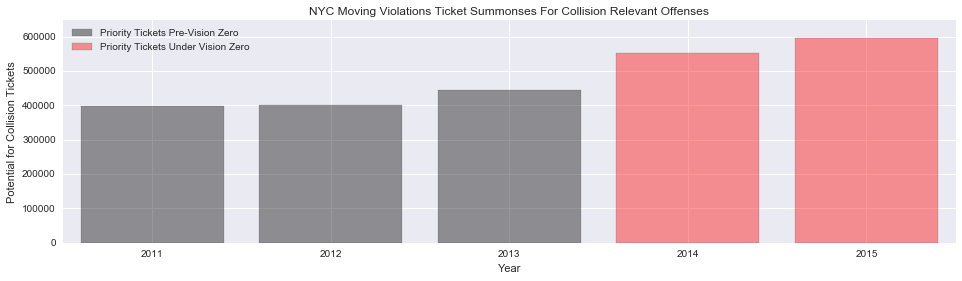

In [10]:
fig1, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (16, 4))
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
width = 0.8
ax1.bar(df.Year[0:3], df.Priority_Tickets[0:3], color = 'k', alpha = 0.4,
         label = 'Priority Tickets Pre-Vision Zero', align = 'center')
ax1.bar(df.Year[3:5], df.Priority_Tickets[3:5], color = 'r', alpha = 0.4,
         label = 'Priority Tickets Under Vision Zero', align = 'center')
ax1.set_ylabel('Potential for Collision Tickets')
ax1.set_xlabel('Year')
ax1.set_title('NYC Moving Violations Ticket Summonses For Collision Relevant Offenses')
ax1.axis([2010.5, 2015.5, 0, 650000])
ax1.legend(loc = 'upper left')

In [11]:
prevz = df.Priority_Tickets[0:3].mean()
vz = df.Priority_Tickets[3:5].mean()

x = sc.ttest_ind(df.Priority_Tickets[0:3], df.Priority_Tickets[3:5], equal_var = False)
if x[1] < 0.05:
    print 'At p=0.05 we can reject the null hypothesis that there is no difference ' + \
    'or a decrease in the number of dangerous driving tickets issued by the NYPD. ' + \
    'Accordingly, we can accept the alternative hypothesis, where there was an increase ' + \
    'in tickets issued for relevant offenses after Vision Zeros beginning'
else:
    print 'At p=0.05 we cannot reject the null hypothesis: there is no difference ' + \
    'or a decrease in the number of dangerous driving tickets issued by the NYPD.'

At p=0.05 we can reject the null hypothesis that there is no difference or a decrease in the number of dangerous driving tickets issued by the NYPD. Accordingly, we can accept the alternative hypothesis, where there was an increase in tickets issued for relevant offenses after Vision Zeros beginning
